# Homework 3

In [227]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
%matplotlib inline
from scipy.interpolate import CubicSpline

### Question 1

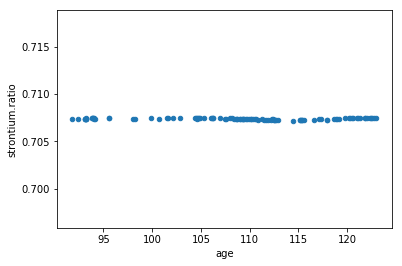

In [228]:
# Load the fossil dataset
fossil = pd.read_csv("/Users/Sundipta/Downloads/fossil.csv")
fossil = fossil.sort_values("age")

fossil_X = fossil[["age"]]
fossil_Y = fossil[["strontium.ratio"]]

fossil.plot("age","strontium.ratio", kind = "scatter")

('Coefficients: \n', array([[ -1.42993299e-06]]))
Mean squared error: 0.00000000556
Variance score: 0.0293


([], <a list of 0 Text yticklabel objects>)

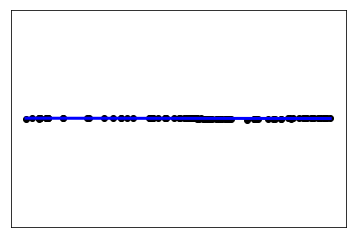

In [229]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(fossil_X, fossil_Y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.11f"
      % np.mean((regr.predict(fossil_X) - fossil_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % regr.score(fossil_X, fossil_Y))

# Plot outputs
plt.scatter(fossil_X, fossil_Y,  color='black')
plt.plot(fossil_X, regr.predict(fossil_X), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())


In [230]:
cs = CubicSpline(fossil_X.iloc[:,0],fossil_Y.iloc[:,0])
xs = np.linspace(fossil_X.min(), fossil_X.max(),200)
cs(xs)


array([ 0.707343  ,  0.70742441,  0.70743869,  0.70740752,  0.7073526 ,
        0.7072956 ,  0.70725822,  0.70726215,  0.70732907,  0.70741707,
        0.70788865,  0.7078848 ,  0.70765431,  0.70744616,  0.70742507,
        0.70739937,  0.7074584 ,  0.70746597,  0.70743801,  0.70739043,
        0.70733916,  0.70730013,  0.70728926,  0.70732248,  0.70741571,
        0.70755064,  0.7076536 ,  0.70772439,  0.70776667,  0.7077841 ,
        0.70778036,  0.7077591 ,  0.70772398,  0.70767868,  0.70762685,
        0.70757216,  0.70751827,  0.70746885,  0.70742756,  0.70739806,
        0.70738401,  0.70738598,  0.70739348,  0.70740215,  0.70741129,
        0.70742019,  0.70742814,  0.70743443,  0.70743835,  0.70743919,
        0.70743624,  0.7074288 ,  0.70741639,  0.70740133,  0.70738786,
        0.70738025,  0.70738276,  0.70739967,  0.70743268,  0.7074701 ,
        0.70749587,  0.70749394,  0.70744829,  0.70739334,  0.70739469,
        0.70742587,  0.70745694,  0.70746903,  0.70746529,  0.70

### Question 2

In [231]:
genotype = pd.read_csv("/Users/Sundipta/Downloads/cholestrol_genotype.txt", sep = "\t", header = None)
phenotype = pd.read_csv("/Users/Sundipta/Downloads/cholestrol_phenotype.txt",sep = "\t", header = None)

In [232]:
phenotype = phenotype.T

In [233]:
phenotype.head()

,0
0,0.000000
1,-1.583340
2,0.202487
3,-2.203830
4,-0.334477


In [234]:
genotype = genotype.T
genotype.head()

,0,1,2,3,4,5,6,7,8,9,...,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332
0,1,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
1,1,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,1,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
3,0,1,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,1
4,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,1,1,1,1,0


In [235]:
# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(genotype, phenotype)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
error = np.mean((regr.predict(genotype) - phenotype) ** 2)
print("Mean squared error:", error.head())
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % regr.score(genotype, phenotype))


('Coefficients: \n', array([[  1.87073284e+12,  -1.44109959e+12,   3.57119851e+12, ...,
          9.83531746e+10,  -2.36548513e+11,   1.00121643e+11]]))
('Mean squared error:', 0    0.033588
dtype: float64)
Variance score: 0.96580


In [236]:
from sklearn.linear_model import Ridge

In [237]:
clf = Ridge(alpha=1.0)
clf.fit(genotype, phenotype) 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

## Question 3

In [238]:
labels = pd.read_csv("/Users/Sundipta/Downloads/nci.info.txt", sep = "\t", header = None)
data = pd.read_csv("/Users/Sundipta/Downloads/nci.data.txt", delim_whitespace=True, header = None)

In [239]:
labels = labels[7:]

In [240]:
data=data.T

In [249]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [242]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=14, random_state=0).fit(data)

In [243]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [244]:
print(pca.explained_variance_ratio_) 

[ 0.14892938  0.08300699]


In [245]:
pca.components_ 

array([[ -5.09624387e-03,  -1.64234854e-03,  -2.50924199e-03, ...,
         -4.70525378e-05,   6.60722209e-03,   1.77413047e-02],
       [ -9.83714980e-04,  -3.43514081e-03,   1.58390197e-03, ...,
         -8.74178939e-03,  -3.05924190e-03,   9.50830191e-04]])

In [246]:
pca_df = pd.DataFrame(pca.components_)

In [247]:
pca_df = pca_df.T
pca_df.head()

,0,1
0,-0.005096,-0.000984
1,-0.001642,-0.003435
2,-0.002509,0.001584
3,0.004940,-0.007843
4,-0.003365,0.000268


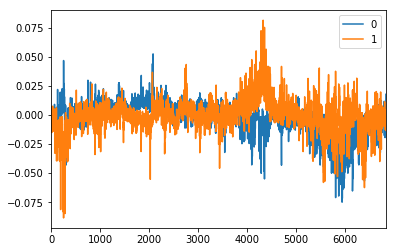

In [248]:
pca_df.plot()

Not very separable. 